## Experiment 1.a - Implementation of Time and Frequency domain of a signal using Python
---

In [10]:
# Importing libraries
import numpy as np
import random
import matplotlib.pyplot as plt
import control as ctr
import pylab as pl
import sys 

# Since we require a discrete frequency, we need to convert our continuous data to discrete using the following function
from control.matlab import c2d

# Starting to write outputs from cells to a log file
stdoutOrigin = sys.stdout 
sys.stdout = open("log.txt", "w")

In [11]:
# Generating a random numerator
numerator = random.randint(0, 10)

# Generating three random numbers to be the polynomials coefficients
coefficients = []
for i in range(3):
    coefficients.append(
        random.random()
    )

# Creating a transfer function
g = ctr.TransferFunction(
    numerator,
    coefficients
)

In [12]:
# Hard coding the coefficients cos I quite like the way this looks
# coefficients = [0.7969569163794469, 0.08970023934623406, 0.5930328075294755]
# coefficients = [0.5368, 0.0141, 0.4288]
# numerator = 1

# Creating the transfer function (tf)
g = ctr.TransferFunction(
    numerator,
    coefficients
)

# Getting a closer look at the transfer function
print('Printing the transfer function generated:')
print(g)
g

TransferFunction(array([6]), array([0.53681483, 0.01410195, 0.42883136]))

### Plotting the time domain

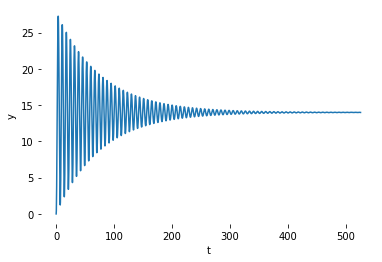

In [13]:
# Creating a step response using the control function
t, y = ctr.step_response(g)

# Removing the box around the graph
plt.box(False)

# Labelling axes
plt.xlabel('t')
plt.ylabel('y')

# Plotting the variables t and y
plt.plot(t, y)

In [14]:
# Closer look at t and y
print('Shapes of x and y axes')
print('t:', np.shape(t), '| y:', np.shape(y))
print('\nPrinting t:', t, '\nPrinting y:', y, sep='\n')

### Plotting the frequency domain

In [23]:
# Converted the continuous transfer function to a discrete one
Dg = c2d(g, 0.5)

# Printing the new discrete tf
print('\nPrinting the discrete transfer function generated:', Dg)
Dg


Printing the discrete transfer function generated: 
   1.368 z + 1.362
---------------------
z^2 - 1.792 z + 0.987

dt = 0.5



TransferFunction(array([1.36805611, 1.36203949]), array([ 1.        , -1.79182594,  0.98695105]), 0.5)

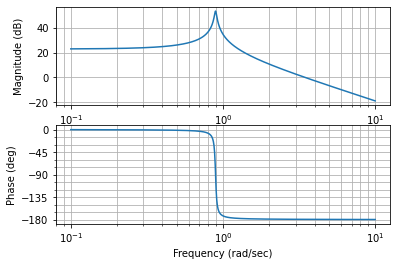

In [24]:
# Bode graph for the continuous tf
mag, phase, omega = ctr.bode(g)

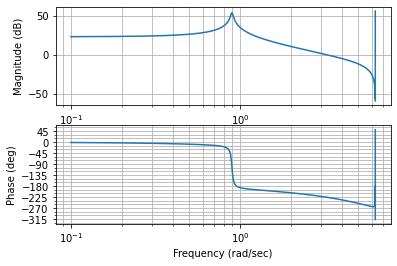

In [25]:
# Bode graph for the discrete tf
mag, phase, omega = ctr.bode(Dg)

In [18]:
# Stop writing output to log file
sys.stdout.close()
sys.stdout = stdoutOrigin


---

## Resources
General links <br>
1. https://www.mathworks.com/help/control/ref/lti.d2c.html
2. https://python-control.readthedocs.io/en/latest/generated/control.TransferFunction.html
3. https://stackoverflow.com/questions/25023233/how-to-save-python-screen-output-to-a-text-file
4. https://python-control.readthedocs.io/en/latest/generated/control.TransferFunction.html

For some *light* reading <br>
5. https://web.njit.edu/~levkov/classes_files/ECE232/Handouts/Frequency%20Response.pdf

Master bode graph plotting notebook <br>
6. https://jckantor.github.io/CBE30338/05.03-Creating-Bode-Plots.html

### Control Systems Guide
https://depts.washington.edu/airlab/wordpress/wp-content/uploads/2022/02/fuller_greiner_moore_murray_vanpaassen_yorke_python_control_cdc21-compressed.pdf